In [1]:
#importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading The Csv file
data=pd.read_csv("sales_full_data.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
# Number of Rows
print(data.shape[0])

# Columns name
print(data.columns.tolist())



186850
['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']


In [4]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09-01-19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [5]:
#dropping the Na rows
data=data.dropna().reset_index(drop=True)

In [6]:
print(data)

       Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1        176559  Bose SoundSport Headphones                1      99.99   
2        176560                Google Phone                1        600   
3        176560            Wired Headphones                1      11.99   
4        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186300   259353      AAA Batteries (4-pack)                3       2.99   
186301   259354                      iPhone                1        700   
186302   259355                      iPhone                1        700   
186303   259356      34in Ultrawide Monitor                1     379.99   
186304   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       04/19/19 08:46           

In [7]:
# Datatypes
print(data.dtypes)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object


# Which month had the highest and lowest Sales

In [8]:
#converting datatypes of Order ID, Qunatity Ordered, Price Each
data['Order ID']=pd.to_numeric(data['Order ID'],errors='coerce')
data['Quantity Ordered']=pd.to_numeric(data['Quantity Ordered'],errors='coerce')
data['Price Each']=pd.to_numeric(data['Price Each'],errors='coerce')


In [9]:
data.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [10]:
#Splitting the Order Date into Date and Time
data[['Date', 'Time']] = data['Order Date'].str.split(' ', n=1, expand=True)

In [11]:
#Converting datatypes of Date
data['Date']= pd.to_datetime(data['Date'], errors='coerce')
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
data['Date']= pd.to_datetime(data['Date'])

In [12]:
data.dtypes

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date                  object
Purchase Address            object
Date                datetime64[ns]
Time                        object
dtype: object

In [13]:
#Extracting month from date
data['month'] = data['Date'].dt.month

In [14]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time,month
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19,08:46,4.0
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07,22:30,4.0
2,176560.0,Google Phone,1.0,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38,4.0
3,176560.0,Wired Headphones,1.0,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38,4.0
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30,09:27,4.0
...,...,...,...,...,...,...,...,...,...
186300,259353.0,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",2019-09-17,20:56,9.0
186301,259354.0,iPhone,1.0,700.00,09-01-19 16:00,"216 Dogwood St, San Francisco, CA 94016",2019-09-01,16:00,9.0
186302,259355.0,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",2019-09-23,07:39,9.0
186303,259356.0,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",2019-09-19,17:30,9.0


In [15]:
#Calculating Total sale price and introducing it as a column in the table
data["total_sale"]=data['Quantity Ordered']*data['Price Each']

In [16]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time,month,total_sale
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19,08:46,4.0,23.90
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07,22:30,4.0,99.99
2,176560.0,Google Phone,1.0,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38,4.0,600.00
3,176560.0,Wired Headphones,1.0,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38,4.0,11.99
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30,09:27,4.0,11.99
...,...,...,...,...,...,...,...,...,...,...
186300,259353.0,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",2019-09-17,20:56,9.0,8.97
186301,259354.0,iPhone,1.0,700.00,09-01-19 16:00,"216 Dogwood St, San Francisco, CA 94016",2019-09-01,16:00,9.0,700.00
186302,259355.0,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",2019-09-23,07:39,9.0,700.00
186303,259356.0,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",2019-09-19,17:30,9.0,379.99


In [17]:
# calculating sum of total sale by each month
data1=data.groupby('month')['total_sale'].sum()

In [18]:
data1

month
1.0     1.822257e+06
2.0     2.202022e+06
3.0     2.807100e+06
4.0     3.390670e+06
5.0     3.152607e+06
6.0     2.577802e+06
7.0     2.647776e+06
8.0     2.244468e+06
9.0     2.097560e+06
10.0    3.736727e+06
11.0    3.199603e+06
12.0    4.613443e+06
Name: total_sale, dtype: float64

In [19]:
data1.columns=['Month', 'Total_Sale']

In [20]:
data1.head()

month
1.0    1.822257e+06
2.0    2.202022e+06
3.0    2.807100e+06
4.0    3.390670e+06
5.0    3.152607e+06
Name: total_sale, dtype: float64

In [21]:
type(data1)

pandas.core.series.Series

In [22]:
# converting datatype of data1 that is from series to DataFrame
data1=data1.to_frame().reset_index()

In [23]:
data1

,month,total_sale
0,1.0,1.822257e+06
1,2.0,2.202022e+06
2,3.0,2.807100e+06
3,4.0,3.390670e+06
4,5.0,3.152607e+06
5,6.0,2.577802e+06
6,7.0,2.647776e+06
7,8.0,2.244468e+06
8,9.0,2.097560e+06
9,10.0,3.736727e+06


In [24]:
#converting value of month from from float to int
data1['month'] = data1['month'].apply(np.int64)

In [25]:
np.round(data1, 2)

,month,total_sale
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


In [26]:
x=data1['month']
y=data1['total_sale']

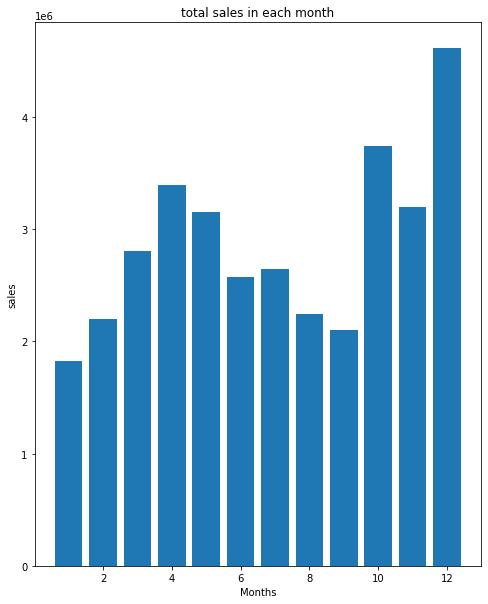

In [27]:
plt.figure(figsize=(8,10))
plt.bar(x,y);
plt.xlabel("Months")
plt.ylabel("sales")
plt.title("total sales in each month");
#plt.legend()


# At what time of the day would you put out advertisemnet so that sales increase

In [28]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time,month,total_sale
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19,08:46,4.0,23.90
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07,22:30,4.0,99.99
2,176560.0,Google Phone,1.0,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38,4.0,600.00
3,176560.0,Wired Headphones,1.0,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38,4.0,11.99
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30,09:27,4.0,11.99
...,...,...,...,...,...,...,...,...,...,...
186300,259353.0,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",2019-09-17,20:56,9.0,8.97
186301,259354.0,iPhone,1.0,700.00,09-01-19 16:00,"216 Dogwood St, San Francisco, CA 94016",2019-09-01,16:00,9.0,700.00
186302,259355.0,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",2019-09-23,07:39,9.0,700.00
186303,259356.0,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",2019-09-19,17:30,9.0,379.99


In [29]:
data.dtypes

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date                  object
Purchase Address            object
Date                datetime64[ns]
Time                        object
month                      float64
total_sale                 float64
dtype: object

In [30]:
#converting datatype of Time and extracting hour from it
data['Time']= pd.to_datetime(data['Time'], errors='coerce')
data['hour'] = data['Time'].dt.hour
#data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
#data['Date']= pd.to_datetime(data['Date'])

In [31]:
data.dtypes

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date                  object
Purchase Address            object
Date                datetime64[ns]
Time                datetime64[ns]
month                      float64
total_sale                 float64
hour                       float64
dtype: object

In [32]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time,month,total_sale,hour
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19,2021-12-09 08:46:00,4.0,23.90,8.0
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07,2021-12-09 22:30:00,4.0,99.99,22.0
2,176560.0,Google Phone,1.0,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,2021-12-09 14:38:00,4.0,600.00,14.0
3,176560.0,Wired Headphones,1.0,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,2021-12-09 14:38:00,4.0,11.99,14.0
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30,2021-12-09 09:27:00,4.0,11.99,9.0
...,...,...,...,...,...,...,...,...,...,...,...
186300,259353.0,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",2019-09-17,2021-12-09 20:56:00,9.0,8.97,20.0
186301,259354.0,iPhone,1.0,700.00,09-01-19 16:00,"216 Dogwood St, San Francisco, CA 94016",2019-09-01,2021-12-09 16:00:00,9.0,700.00,16.0
186302,259355.0,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",2019-09-23,2021-12-09 07:39:00,9.0,700.00,7.0
186303,259356.0,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",2019-09-19,2021-12-09 17:30:00,9.0,379.99,17.0


In [34]:
data2=data.groupby('hour')['Quantity Ordered'].sum()

In [35]:
data2=data2.to_frame().reset_index()

In [36]:
data2

,hour,Quantity Ordered
0,0.0,4428.0
1,1.0,2619.0
2,2.0,1398.0
3,3.0,928.0
4,4.0,937.0
5,5.0,1493.0
6,6.0,2810.0
7,7.0,4556.0
8,8.0,7002.0
9,9.0,9816.0


In [37]:
data2.dtypes

hour                float64
Quantity Ordered    float64
dtype: object

In [38]:
data2.columns=['Hour', 'Numbers of Order']

In [39]:
data2.dtypes

Hour                float64
Numbers of Order    float64
dtype: object

In [40]:
data2

,Hour,Numbers of Order
0,0.0,4428.0
1,1.0,2619.0
2,2.0,1398.0
3,3.0,928.0
4,4.0,937.0
5,5.0,1493.0
6,6.0,2810.0
7,7.0,4556.0
8,8.0,7002.0
9,9.0,9816.0


In [41]:
data2['Hour'] = data2['Hour'].apply(np.int64)

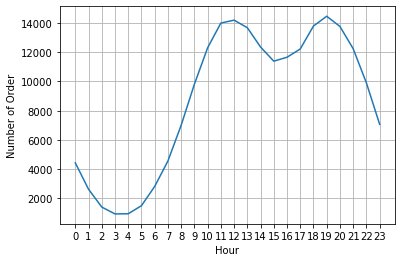

In [42]:
x=data2['Hour']
y=data2['Numbers of Order']
plt.xticks(x)
plt.plot(x,y)
plt.xlabel('Hour')
plt.ylabel('Number of Order')
plt.grid()
plt.show()

# What produts are sold most

In [43]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time,month,total_sale,hour
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19,2021-12-09 08:46:00,4.0,23.90,8.0
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07,2021-12-09 22:30:00,4.0,99.99,22.0
2,176560.0,Google Phone,1.0,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,2021-12-09 14:38:00,4.0,600.00,14.0
3,176560.0,Wired Headphones,1.0,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,2021-12-09 14:38:00,4.0,11.99,14.0
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30,2021-12-09 09:27:00,4.0,11.99,9.0
...,...,...,...,...,...,...,...,...,...,...,...
186300,259353.0,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",2019-09-17,2021-12-09 20:56:00,9.0,8.97,20.0
186301,259354.0,iPhone,1.0,700.00,09-01-19 16:00,"216 Dogwood St, San Francisco, CA 94016",2019-09-01,2021-12-09 16:00:00,9.0,700.00,16.0
186302,259355.0,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",2019-09-23,2021-12-09 07:39:00,9.0,700.00,7.0
186303,259356.0,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",2019-09-19,2021-12-09 17:30:00,9.0,379.99,17.0


In [44]:
#identifying duplicates Row
temp_df = data[data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time,month,total_sale,hour
517,NaN,Product,NaN,NaN,Order Date,Purchase Address,NaT,NaT,NaN,NaN,NaN
1146,NaN,Product,NaN,NaN,Order Date,Purchase Address,NaT,NaT,NaN,NaN,NaN
1152,NaN,Product,NaN,NaN,Order Date,Purchase Address,NaT,NaT,NaN,NaN,NaN
2869,NaN,Product,NaN,NaN,Order Date,Purchase Address,NaT,NaT,NaN,NaN,NaN
2884,NaN,Product,NaN,NaN,Order Date,Purchase Address,NaT,NaT,NaN,NaN,NaN


In [45]:
print('Looks like there are '+str(temp_df.shape[0])+' rows with the header row duplicated!')

Looks like there are 355 rows with the header row duplicated!


In [46]:
#Deleting duplicates Row
del temp_df

In [47]:
data = data[data['Order Date'].str[0:2] != 'Or']
data.shape

(185950, 11)

In [48]:
# Keeping only the ones which have duplicated Order ID
df = data[data['Order ID'].duplicated(keep=False)]

# Joining all the Products with same Order ID by ',' and storing in 'Grouped' column
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Take only the Order ID and Grouped columns and drop duplicates
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(100)

<ipython-input-48-77bb379e7832>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,176560.0,"Google Phone,Wired Headphones"
17,176574.0,"Google Phone,USB-C Charging Cable"
29,176585.0,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586.0,"AAA Batteries (4-pack),Google Phone"
118,176672.0,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2654,179108.0,"Lightning Charging Cable,AAA Batteries (4-pack)"
2675,179128.0,"iPhone,Apple Airpods Headphones"
2710,179162.0,"Google Phone,USB-C Charging Cable"
2775,179226.0,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [49]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [50]:
data.groupby('Order ID').count().sort_values(['Product'], axis=0, ascending=False)


,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time,month,total_sale,hour
Order ID,,,,,,,,,,
160873.0,5,5,5,5,5,5,5,5,5,5
312462.0,4,4,4,4,4,4,4,4,4,4
242936.0,4,4,4,4,4,4,4,4,4,4
235798.0,4,4,4,4,4,4,4,4,4,4
165665.0,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...
201973.0,1,1,1,1,1,1,1,1,1,1
201974.0,1,1,1,1,1,1,1,1,1,1
201975.0,1,1,1,1,1,1,1,1,1,1


In [51]:
product_group = data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']


In [52]:
quantity_ordered

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

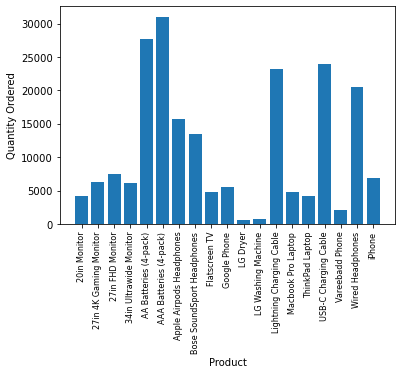

In [53]:
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation ='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()